In [1]:
import re
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np

#create the list of dictinary formatted strings by extracting data item
#from twitter API scrape
#files = ['twtgun3.24.1.txt', 'twtgun3.24.2.txt','twtgun3.24.3.txt', 'twtgun3.24.4.txt'] This part of codes runs only
#once. We simply use df.csv from second time on.
#
# group = []
# for i in range(1,11):
   
#     with open('/Users/satokosuda/gun/twtgun3.24.' + str(i) + '.txt') as fhand:
#         for item in fhand:
#             dic = {}
#             x = re.findall("^{'created_at': \'(.*?)\'", item)
#             if len(x) > 0:
#                 dic["created_at"] = str(x[0])
#             else:
#                 dic["created_at"] = None
#             y = re.findall("{'full_text': \'(.*?)\'", item)
#             if len(y) > 0:
#                 dic["full_text"] = str(y[0])
#             else:
#                 dic["full_text"] = None
#             z = re.findall(" 'text': \'(.*?)\'", item)
#             if len(z) > 0:
#                 dic["text"] = str(z[0])
#             else:
#                 dic["text"] = None
#             a = re.findall("\'location\': \'(.*?)\'", item)
#             if len(a) > 0:
#                 dic["location"] = str(a[0])
#             else:
#                 dic["location"] = None
#             b = re.findall("\'time_zone\': \'(.*?)\'", item)
#             if len(b) > 0:
#                 dic["time_zone"] = str(b[0])
#             else:
#                 dic["time_zone"] = None
#             group.append(dic)

#     fhand.close()

# #convert the list into json object

# with open('data.json', 'w') as fp:
#     json.dump(group, fp)

# # convert json file into pandas DataFrame
# df = pd.read_json('data.json')

In [2]:
#df.sample(5)  # To check the data
#df.to_csv('df.csv')

In [3]:
df = pd.read_csv('/Users/satokosuda/gun/df.csv')

In [4]:
df2 = df.reindex(columns = ['created_at','location','time_zone','text','full_text'])
pd.options.display.max_rows=10

In [5]:
df2['text'] = df2['text'].replace(r'\\n', '', regex=True).str.lower()
df2['text'] = df2['text'].str.strip()
df2['full_text'] = df2['full_text'].replace(r'\\n', '', regex=True).str.lower()
df2['full_text'] = df2['full_text'].str.strip()

In [6]:
print(df2.head())    # To check the data

            created_at                location                   time_zone  \
0                  NaN                     CNY                         NaN   
1  2018-03-24 17:23:06  Bearvana, #OpFuckBaba   Pacific Time (US & Canada)   
2  2018-03-24 17:23:06     South West, England                         NaN   
3  2018-03-24 17:23:07                     NaN                         NaN   
4  2018-03-24 17:23:08            Arizona, USA  Pacific Time (US & Canada)   

                                                text  \
0                #guncontrol https://t.co/oc8a0uwgco   
1       rt @redpainter1: hey @dloeschhear that? that   
2                                                NaN   
3  rt @we_patriot: here it is in black and white-...   
4  rt @madriannorman: #marchforourlives #2ndamend...   

                                           full_text  
0                                                NaN  
1                        hey @dloeschhear that? that  
2                            

In [7]:
#df2['full_text'].str.findall('\\n') just to make sure no data will be found

In [8]:
#make copy of df2 and name it df3
df3 = df2

In [9]:
#Take 'full_text' when available, otherwise take 'text'
df3['tweet'] = df3['full_text'].where(pd.notna(df3['full_text']), other = df3['text'])
#Use time_zone for proxy of location when location data is missing
df3['location_'] = df3['location'].where(pd.notna(df3['location']), other = df3['time_zone'])

In [10]:
pd.isna(df3['tweet']).sum()  # Check how many 'tweet' observations are missing

3548

In [11]:
#drop columns 'text' & 'full_text', 'location' & 'time_zone'
df3 = df3.drop(['text', 'full_text', 'location', 'time_zone'], axis=1)
#rename 'location_' column to 'location' then reindex dataframe 
df3.rename(columns = {'location_':'location'}, inplace = True)
df3.reindex(columns = ['created_at','location','tweet'])

#drop rows where all columns are NaN
df3 = df3.dropna(how='all')

In [12]:
#Extract hashtag from 'tweet' and create a new cloumn 'hashtag'
df3['hashtag'] = df3['tweet'].str.findall(r'#.*?\s')  # .findall returns list which causes issues later

In [13]:
df3 = df3.reindex(columns = ['created_at','location','tweet', 'hashtag'])
print(df3.sample(5))

                created_at                    location  \
30138  2018-03-24 23:03:53  Pacific Time (US & Canada)   
10209  2018-03-24 20:46:32                Longview, TX   
5244   2018-03-24 20:24:02                 Larp-A-Lago   
5249   2018-03-24 20:24:03            Toronto, Ontario   
34802  2018-03-24 23:35:44                     seattle   

                                                   tweet  \
30138  @barackobama #votethemout2018 #goptraitors #tr...   
10209  “will black lives ever matter?” by @nilegirl h...   
5244                                                 NaN   
5249   rt @caitmcguire: 200,000 new yorkers out on a ...   
34802  rt @berniceking: with #parkland students after...   

                                                 hashtag  
30138  [#votethemout2018 , #goptraitors , #trumptrait...  
10209  [#blacklivesmatter , #policebrutality , #gunvi...  
5244                                                 NaN  
5249                      [#marchforourlives , #enough

In [14]:
# Convert 'created_at' time data into US & Canada Eastern Time and adjust for day light saving

In [15]:
df3['created_at'].dtypes

dtype('O')

In [16]:
pd.isna(df3['created_at']).sum()

1

In [17]:
df3['created_at'].fillna(method='bfill', inplace=True)
df3['created_at'].head()

0    2018-03-24 17:23:06
1    2018-03-24 17:23:06
2    2018-03-24 17:23:06
3    2018-03-24 17:23:07
4    2018-03-24 17:23:08
Name: created_at, dtype: object

In [18]:
#Can I rewrite code beleow without using lamda (so don't need to handle float)?

In [19]:
# Convert'created_at' time data rounding to nearest minute 
#df3['created_at'] = df3['created_at'].apply(lambda x: x.round('min'))
df3['created_at'] = df3['created_at'].str[:-3]

In [20]:
df3.head()

,created_at,location,tweet,hashtag
0,2018-03-24 17:23,CNY,#guncontrol https://t.co/oc8a0uwgco,[#guncontrol ]
1,2018-03-24 17:23,"Bearvana, #OpFuckBaba",hey @dloeschhear that? that,[]
2,2018-03-24 17:23,"South West, England",NaN,NaN
3,2018-03-24 17:23,NaN,here it is in black and white-the truth! @potu...,"[#qanon , #internetbillofrights , #guncontrol ..."
4,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n..."


In [21]:
#Set 'created_at' field to be DatetimeIndex of df3 and then convert it to EST time
#idx = pd.DatetimeIndex(df3['created_at'])
#df3.index = idx
#df3_utc = df3.tz_localize(tz='UTC')
#df3_utc.index
#df3_est = df3_utc.tz_convert(tz='US/Eastern')
#df3.index = df3_est.index
#df3.head()
#I want each observation to be uniquely identified with index so I decided not to take this approach
# At this point I just want to check the time trend of the tweets which can be done without time-zone conversion.

In [22]:
# Check how many tweets creatd every minute during the data collection period
df3.groupby('created_at').count()['tweet']

created_at
2018-03-24 17:23     56
2018-03-24 17:24     71
2018-03-24 17:25     70
2018-03-24 17:26     68
2018-03-24 17:27     55
                   ... 
2018-03-25 00:51    121
2018-03-25 00:52    137
2018-03-25 00:53    115
2018-03-25 00:54    137
2018-03-25 00:55     18
Name: tweet, Length: 304, dtype: int64

<IPython.core.display.Javascript object>


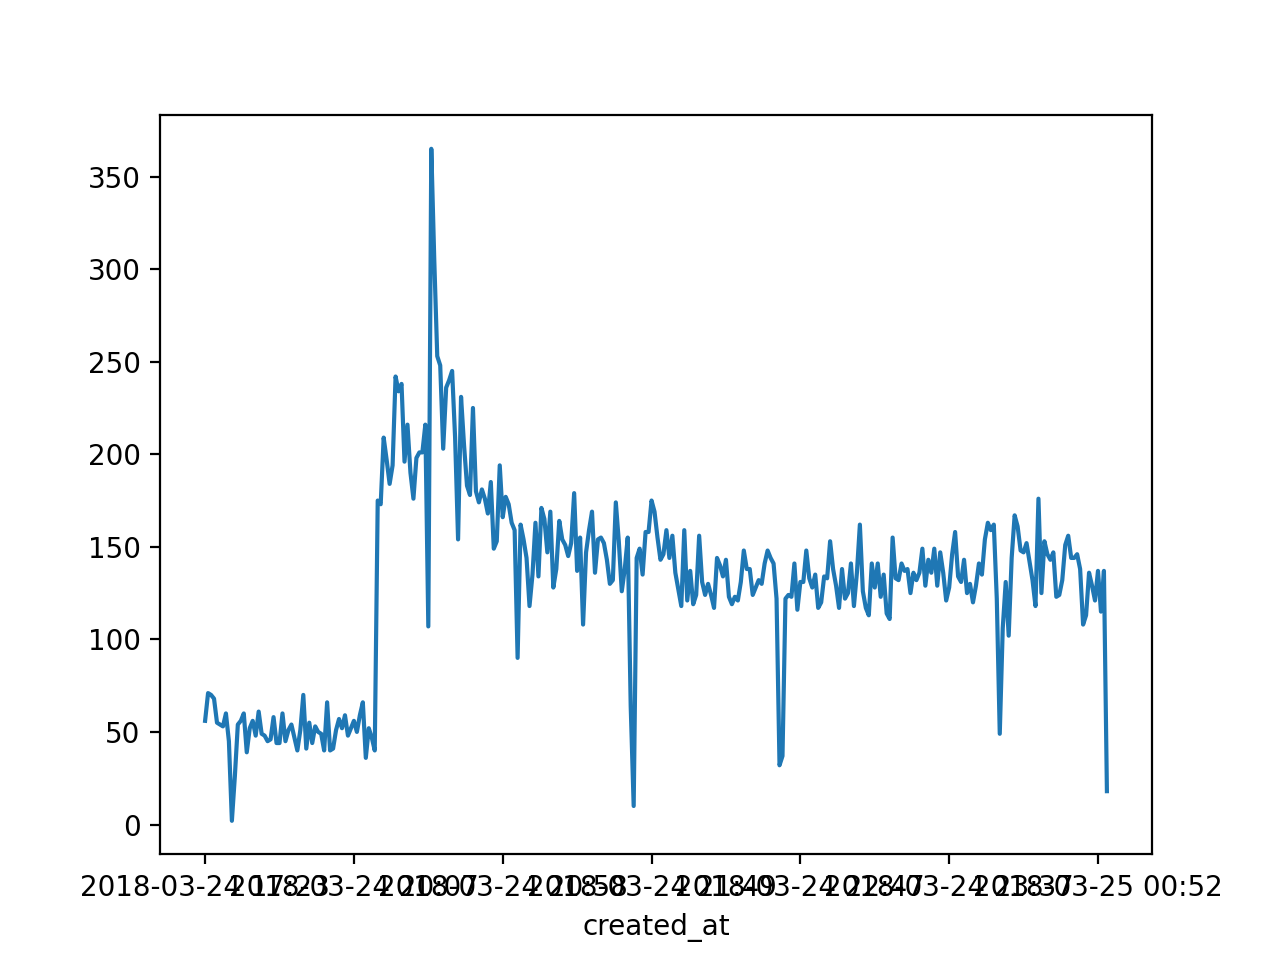

<Axes: xlabel='created_at'>

In [23]:
#UTC is 5 hours earlier than EST. So in the graph below, tweets were peaked around 15:30pm
df3.groupby('created_at').count()['tweet'].plot()

In [24]:
# As the next step, use regular expression to tokenize tweets
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

In [25]:
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [26]:
# Test run using only one tweet
tweet = df3['tweet'][10]
print(preprocess(tweet))   #success!

['rt', '@alessiacara', ':', 'https://t.co/sofihs4oru', 'please', 'click', 'and', 'read', 'up', 'on', 'why', 'this', 'is', 'so', 'important', '.', 'i', 'hope', 'you', 'sign', '.', '#marchforourlives', '#guncontr', '…']


In [27]:
# Create a new dataframe by dropping rows with NA data
df4 = df3.dropna(axis=0, inplace=False)
df4.head()

,created_at,location,tweet,hashtag
0,2018-03-24 17:23,CNY,#guncontrol https://t.co/oc8a0uwgco,[#guncontrol ]
1,2018-03-24 17:23,"Bearvana, #OpFuckBaba",hey @dloeschhear that? that,[]
4,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n..."
5,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n..."
6,2018-03-24 17:23,985✈️DMV,meddling globalist george soros named as the p...,"[#georgesoros , #guncontrol ]"


In [28]:
# Tokenize tweet data in the dataframe
df4.loc[:,'preprocess_tweet'] = df4.loc[:,'tweet'].apply(lambda x : preprocess(x))
df4.head()

/var/folders/kw/cw0dwnss3zx72b1fpbll09fc0000gn/T/ipykernel_31236/1682575121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,'preprocess_tweet'] = df4.loc[:,'tweet'].apply(lambda x : preprocess(x))


,created_at,location,tweet,hashtag,preprocess_tweet
0,2018-03-24 17:23,CNY,#guncontrol https://t.co/oc8a0uwgco,[#guncontrol ],"[#guncontrol, https://t.co/oc8a0uwgco]"
1,2018-03-24 17:23,"Bearvana, #OpFuckBaba",hey @dloeschhear that? that,[],"[hey, @dloeschhear, that, ?, that]"
4,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n...","[rt, @madriannorman, :, #marchforourlives, #2n..."
5,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n...","[rt, @madriannorman, :, #marchforourlives, #2n..."
6,2018-03-24 17:23,985✈️DMV,meddling globalist george soros named as the p...,"[#georgesoros , #guncontrol ]","[meddling, globalist, george, soros, named, as..."


In [29]:
#from nltk download premade stopwords list
from nltk.corpus import stopwords
import string

punc = list(string.punctuation)
stop = stopwords.words('english') + punc + ['rt', 'via', '’', 'amp']

In [30]:
#Test run using only one tweet
terms_nostop = [term for term in preprocess(tweet) if term not in stop]  #success!

In [31]:
# There are 37487 rows in df4. for each item (list) in the 'preprocess_tweet' column, check if it's non-empty, then 
# remove stop words from the item and append it to the longer 'items' list. Since the data is large, 
# increase data rate by jupyter notebook --NotebookApp.iopub_data_rate_limit=1.0e10

items = []
for item in df4['preprocess_tweet']:
    if len(item) !=0:
        for i in item:
            if i not in stop and not i.startswith(('#', '@')):
                items.append(i.strip())
            else:
                continue  
    else:
        continue
        
print(items[:10])

['https://t.co/oc8a0uwgco', 'hey', 'https://t.co/tqe7k0yvgj', 'https://t.co/tqe7k0yvgj', 'meddling', 'globalist', 'george', 'soros', 'named', 'puppet']


In [32]:
# Listing top 30 most common words in tweets during the data collection period
import operator
from collections import Counter

count_all = Counter()
count_all.update(items)
print(count_all.most_common(30))    

[('today', 8636), ('pier', 5412), ('gun', 5213), ('march', 5103), ('people', 4938), ('day', 4236), ('every', 4047), ('thousands', 3496), ('common', 3483), ('sense', 3377), ('speaking', 3302), ('young', 3249), ('demand', 3228), ('guns', 3149), ('americans', 2937), ('legislation', 2841), ('south', 2734), ('prevention', 2734), ('view', 2723), ('overflowed', 2712), ('bay', 2711), ('https://t.co/aeo98ltgzf', 2704), ('lives', 2650), ('students', 2644), ('…', 2628), ('school', 2507), ('youth', 2489), ('stories', 2118), ('kids', 2069), ('️', 2030)]


In [33]:
# Creating the list of hashtags tweeted during the data colletion period
hashlist = []
for item in df4['hashtag']:
    if len(item) !=0:
        for i in item:
            if i.startswith('#'):
                hashlist.append(i.strip())
            else:
                continue  
    else:
        continue
        
print(hashlist[:10])

['#guncontrol', '#marchforourlives', '#2ndamendment', '#nra', '#nraboycott', '#2a', '#gunreformnow', '#gunviolence', '#marchforourlives', '#2ndamendment']


In [34]:
# Listing top 30 most popular hash tags during the data collection period

count_hash = Counter()
count_hash.update(hashlist)
print(count_hash.most_common(30))

[('#marchforourlives', 21017), ('#enough', 15252), ('#neveragain', 6940), ('#guncontrol', 6297), ('#gunviolence', 5710), ('#hermosabeach', 2706), ('#guncontrol.', 2334), ('#gunreformnow', 1939), ('#gunreform', 1473), ('#guncontrolnow', 1416), ('#2a', 1267), ('#enoughisenough', 1249), ('#parkland', 1122), ('#march4ourlives', 1104), ('#guncontolnow', 1080), ('#notonemore', 1018), ('#nra', 969), ('#gunsense', 907), ('#resist', 876), ('#momsdemandaction', 830), ('#trump', 809), ('#nrakillskids', 709), ('#gunsensenow', 703), ('#wecallbs', 632), ('#impeachtrump', 595), ('#endgunviolence', 578), ('#theresistance', 578), ('#maga', 562), ('#blacklivesmatter', 520), ('#votethemout', 517)]


In [35]:
# to remove emojis from tokens, compile emoji patterns to be removed

emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F500"  # symbols & pictographs
        u"\U0001F520-\U0001F52F"
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)                          
        u"\U0001F910-\U0001F96B" 
        u"\U0001F52B"
        u"\U0001F5E3"             # speech
        u"\U0001F5F3"             # vote 
        u"\U0001F91B-\U0001F939"                   
        u"\U0001F191-\U0001F19A"
        u"\U0001F595"
                             "]+", flags = re.UNICODE)

In [36]:
# Remove emojis from the list of tokenized words
items_noemoji = []
for item in items:
    i = emoji_pattern.sub(r'', item)
    items_noemoji.append(i)
    
print(items_noemoji[:10])

['https://t.co/oc8a0uwgco', 'hey', 'https://t.co/tqe7k0yvgj', 'https://t.co/tqe7k0yvgj', 'meddling', 'globalist', 'george', 'soros', 'named', 'puppet']


In [37]:
# Listing top 30 word-pairs tweeted together during the data collection periods
from nltk import bigrams

terms_bigram = list(bigrams(items_noemoji))
count_bigram = Counter()
count_bigram.update(terms_bigram)
print(count_bigram.most_common(30))

[(('', ''), 4199), (('every', 'day'), 3512), (('common', 'sense'), 3358), (('thousands', 'americans'), 2715), (('prevention', 'legislation'), 2712), (('south', 'bay'), 2709), (('demand', 'common'), 2709), (('sense', 'prevention'), 2707), (('view', 'speaking'), 2706), (('speaking', 'south'), 2706), (('bay', 'pier'), 2706), (('pier', 'thousands'), 2706), (('americans', 'overflowed'), 2706), (('overflowed', 'pier'), 2706), (('pier', 'demand'), 2706), (('legislation', 'https://t.co/aeo98ltgzf'), 2704), (('young', 'people'), 2572), (('march', 'today'), 1880), (('today', 'every'), 1740), (('today', 'youth'), 1731), (('day', 'listen'), 1721), (('listen', 'young'), 1721), (('people', 'follow'), 1719), (('reports', 'march'), 1717), (('youth', 'stories'), 1717), (('stories', 'every'), 1717), (('follow', 'reports'), 1712), (('day', 'https://t.co/udfkgp5xs3'), 1710), (('gun', 'violence'), 1409), (('guy', 'gun'), 1346)]


In [38]:
#Visualize top 30 popular hashtags

import vincent
vincent.core.initialize_notebook()

hash_freq = count_hash.most_common(30)  #create list of tuples
labels, freq = zip(*hash_freq)  #seperate the above into 1. tuple of labels & 2. tuple of counts
data = {'data': freq, 'x': labels} #create dictionary of tuples
bar = vincent.Bar(data, iter_idx='x')
bar.display()

In [39]:
# Create the list of time stamps when #hermosabeach was tweeted
beach_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#hermosabeach' in df4['tweet'].iloc[i]:
        beach_hash_time.append(df4['created_at'].iloc[i])
        
print(beach_hash_time[:10])

['2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16', '2018-03-24 20:16']


In [40]:
# Creating datetimeindex for time series data for pandas. Twitter streaming data is based on UTC time.
# From US & Canada ETS time, it's 4 hours earlier. Adjust for daytime savings.

from pandas.tseries.offsets import Hour
one_hour = Hour(1)

idx = pd.DatetimeIndex(beach_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(beach_hash_time)
#ones
beach_hash = pd.Series(ones, index=idx_est_ds)
per_minute = beach_hash.resample('1min').sum().fillna(0)

In [41]:
#Visualize the frequency of #hermosabeach was tweeted during the data collection period
time_chart = vincent.Line(per_minute)
time_chart.axis_titles(x='Time', y='Hashtag frequencies')
time_chart.display()

/Users/satokosuda/.conda/envs/gun/lib/python3.8/site-packages/vincent/data.py:212: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in pd_obj.iteritems():


In [42]:
# Prepar hashtag #marchforourlives for the same analysis
march_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#marchforourlives' in df4['tweet'].iloc[i]:
        march_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(march_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(march_hash_time)
#ones
march_hash = pd.Series(ones, index=idx_est_ds)
march_per_minute = march_hash.resample('1min').sum().fillna(0)

In [43]:
# Prepar hashtag #enough for the same analysis
enough_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#enough' in df4['tweet'].iloc[i]:
        enough_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(enough_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(enough_hash_time)
#ones
enough_hash = pd.Series(ones, index=idx_est_ds)
enough_per_minute = enough_hash.resample('1min').sum().fillna(0)

In [44]:
# Prepar hashtag #neveragain for the same analysis
again_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#neveragain' in df4['tweet'].iloc[i]:
        again_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(again_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(again_hash_time)
#ones
again_hash = pd.Series(ones, index=idx_est_ds)
again_per_minute = again_hash.resample('1min').sum().fillna(0)

In [45]:
# Prepar hashtag #guncontrol for the same analysis
control_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#guncontrol' in df4['tweet'].iloc[i]:
        control_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(control_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(control_hash_time)
#ones
control_hash = pd.Series(ones, index=idx_est_ds)
control_per_minute = control_hash.resample('1min').sum().fillna(0)

In [46]:
# Prepar hashtag #gunviolence for the same analysis
violence_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#gunviolence' in df4['tweet'].iloc[i]:
        violence_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(violence_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(violence_hash_time)

violence_hash = pd.Series(ones, index=idx_est_ds)
violence_per_minute = violence_hash.resample('1min').sum().fillna(0)

In [47]:
# Prepar hashtag #schoolshooting for the same analysis
school_hash_time =[]

for i in range(len(df4['tweet'])):
    if '#schoolshooting' in df4['tweet'].iloc[i]:
        school_hash_time.append(df4['created_at'].iloc[i])
        
idx = pd.DatetimeIndex(school_hash_time)
idx_local = idx.tz_localize(tz='UTC')
idx_est = idx_local.tz_convert(tz='US/Eastern')
idx_est_ds = idx_est - one_hour    #daytime savings adjustment
ones = [1]*len(school_hash_time)
#ones
school_hash = pd.Series(ones, index=idx_est_ds)
school_per_minute = school_hash.resample('1min').sum().fillna(0)

In [48]:
#Visualize the frequency of #shoolshooting was tweeted
time_chart = vincent.Line(school_per_minute)
time_chart.axis_titles(x='Time', y='Hashtag frequencies')
time_chart.display()

/Users/satokosuda/.conda/envs/gun/lib/python3.8/site-packages/vincent/data.py:212: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for i, v in pd_obj.iteritems():


In [49]:
match_data = dict(Beach=per_minute, March=march_per_minute, Enough=enough_per_minute, Again=again_per_minute, Control=control_per_minute, Violence=violence_per_minute)
all_matches = pd.DataFrame(data = match_data,index=march_per_minute.index)
all_matches

,Beach,March,Enough,Again,Control,Violence
2018-03-24 12:23:00-04:00,NaN,28,4,7,20,16
2018-03-24 12:24:00-04:00,NaN,35,5,4,26,15
2018-03-24 12:25:00-04:00,NaN,34,3,8,27,14
2018-03-24 12:26:00-04:00,NaN,34,8,3,35,14
2018-03-24 12:27:00-04:00,NaN,27,4,4,22,10
...,...,...,...,...,...,...
2018-03-24 19:51:00-04:00,1.0,66,63,23,34,12
2018-03-24 19:52:00-04:00,6.0,67,71,25,40,11
2018-03-24 19:53:00-04:00,6.0,59,44,20,33,18
2018-03-24 19:54:00-04:00,10.0,78,54,22,45,24


In [50]:
#Visualize and comparing the frequencies of the top 3 the most popular hashtags during the data collection time
time_chart_top3 = vincent.Line(all_matches[['March', 'Enough', 'Again']])
time_chart_top3.axis_titles(x='Time', y='Freq')
time_chart_top3.legend(title='Top 3 Most popular hashtags')
time_chart_top3.display()

/Users/satokosuda/.conda/envs/gun/lib/python3.8/site-packages/vincent/data.py:223: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for num, (k, v) in enumerate(row.iteritems()):


In [51]:
#Visualize and comparing the frequencies of the next 3 of the most popular hashtags during the data collection time
time_chart_next3 = vincent.Line(all_matches[['Control', 'Violence', 'Beach']])
time_chart_next3.axis_titles(x='Time', y='Freq')
time_chart_next3.legend(title='Top 4 to 6 Most popular hashtags')
time_chart_next3.display()

/Users/satokosuda/.conda/envs/gun/lib/python3.8/site-packages/vincent/data.py:223: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for num, (k, v) in enumerate(row.iteritems()):


In [52]:
df4.loc[:,'processed_location'] = df4.loc[:,'location'].apply(lambda x: emoji_pattern.sub(r'', x))
hashtag = re.compile(r'(?:\#+[\w_]+[\w\'_\-]*[\w_]+)')
number = re.compile(r'(?:(?:\d+,?)+(?:\.?\d+)?)')

df4.loc[:,'processed_location2'] = df4.loc[:,'processed_location'].apply(lambda x: hashtag.sub(r'', x))
df4.loc[:,'processed_location3'] = df4.loc[:, 'processed_location2'].apply(lambda x: number.sub(r'', x))
df4 = df4.drop(['processed_location2', 'processed_location'], axis=1)

/var/folders/kw/cw0dwnss3zx72b1fpbll09fc0000gn/T/ipykernel_31236/1044893411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,'processed_location'] = df4.loc[:,'location'].apply(lambda x: emoji_pattern.sub(r'', x))
/var/folders/kw/cw0dwnss3zx72b1fpbll09fc0000gn/T/ipykernel_31236/1044893411.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,'processed_location2'] = df4.loc[:,'processed_location'].apply(lambda x: hashtag.sub(r'', x))
/var/folders/kw/cw0dwnss3zx72b1fpbll09fc0000gn/T/ipyk

In [53]:
def pattern(text):
    x = re.compile(r'[\w+][,\s][\s]?(\w+[\s|\.]*\w+)')
    match = x.search(text)
    if match != None:
        return match.group(1)
    else:
        pass

In [54]:
df4['clean_states'] = df4['processed_location3'].apply(lambda text: pattern(text))

In [55]:
def pattern2(text):
    x = re.compile(r'(\w+[\s]*[\w+]+), USA')
    match = x.search(text)
    if match != None:
        return match.group(1)
    else:
        pass

In [56]:
df4['clean_states2'] = df4['processed_location3'].apply(lambda text : pattern2(text))

In [57]:
df4.to_csv('location.csv')

In [58]:
#rename locations taken from time_zone ex) Eastern Time (US & Canada) -> US & Canada EastCoast etc 

In [59]:
df4['states'] = np.where(df4['clean_states'] !="USA", df4['clean_states'], df4['clean_states2'])

In [60]:
df4

,created_at,location,tweet,hashtag,preprocess_tweet,processed_location3,clean_states,clean_states2,states
0,2018-03-24 17:23,CNY,#guncontrol https://t.co/oc8a0uwgco,[#guncontrol ],"[#guncontrol, https://t.co/oc8a0uwgco]",CNY,None,None,None
1,2018-03-24 17:23,"Bearvana, #OpFuckBaba",hey @dloeschhear that? that,[],"[hey, @dloeschhear, that, ?, that]","Bearvana,",None,None,None
4,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n...","[rt, @madriannorman, :, #marchforourlives, #2n...","Arizona, USA",USA,Arizona,Arizona
5,2018-03-24 17:23,"Arizona, USA",rt @madriannorman: #marchforourlives #2ndamend...,"[#marchforourlives , #2ndamendment , #nra , #n...","[rt, @madriannorman, :, #marchforourlives, #2n...","Arizona, USA",USA,Arizona,Arizona
6,2018-03-24 17:23,985✈️DMV,meddling globalist george soros named as the p...,"[#georgesoros , #guncontrol ]","[meddling, globalist, george, soros, named, as...",✈️DMV,None,None,None
...,...,...,...,...,...,...,...,...,...
42774,2018-03-25 00:55,District 13,rt @the____south: we won’t forget you tamir.#t...,"[#tamirrice , #marchforourlives , #blacklivesm...","[rt, @the____south, :, we, won, ’, t, forget, ...",District,None,None,None
42775,2018-03-25 00:55,Australia,"dear @davidhogg111, you’re clearly talking to ...",[#guncontrol. ],"[dear, @davidhogg111, ,, you, ’, re, clearly, ...",Australia,None,None,None
42776,2018-03-25 00:55,"Oakland, CA",@tomilahren hey tomi - we did march for someth...,"[#march4ourlives , #gunreform , #enough ]","[@tomilahren, hey, tomi, -, we, did, march, fo...","Oakland, CA",CA,None,CA
42777,2018-03-25 00:55,🇺🇸 USA 🇺🇸 🦅🦅🦅🦅,keep your friends &amp; family close.keep your...,"[#nra#guncontrolpennsylvania , #marchforourliv...","[keep, your, friends, &, amp, ;, family, close...",USA 🦅🦅🦅🦅,None,None,None
